In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Hypothesis testing exercises

### 1 Has the network latency gone up since we switched internet service providers?
 

 - Reword : How does our current network latency compare to the previous one?
 
 * Null Hipotheses: changing Internet service provider did not affect latency
 * Alternative Hypotheses: changing provider decreased latency

 * True Positive : Network latency decresed after switching ISP
 * True Negative : Network Latency stayed the same after switching ISP

 * Type 1 error : Tests show there is a change in Network latency  after Switching , but it is not the case

 * Type 1 error : Tests show there is no a change in Network latency  after, where there is a change


### 2 Is the website redesign any good?



* Null Hipotheses: redesigning the website  did not affect affect the number of page visitors
 * Alternative Hypotheses: redesigning the website increased the number of page visitors

 * True Positive : redesigning the website increased the number of page visitors by 30%
 * True Negative : After redesigning the website the number of page visitors stayed the same.

 * Type 1 error : Tests show there is a change in the number of visitors  after the redesign, but it is not the case

 * Type 1 error : Tests show there is no a change in the number of visitors  after the redesign, where there is a change


### 3 Is our television ad driving more sales?



 * Null Hipotheses: Television ads  did not affect affect sales
 * Alternative Hypotheses: Television ads increased sales
 
 * True Positive : Television ads  increased  sales by 30%
 * True Negative : Television ads  did not have any effect on sales

 * Type 1 error : Tests show there is a change in sales  after the Tv ads, but it is not the case

 * Type 1 error : Tests show there is no a change in sales after the Tv ads, where there is a change


### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office 
 - #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office
 - #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

 * Null Hipotheses:  avrage time to sell a house at office one is the same as at office 2 
 * Alternative Hypotheses: average time to sell a house at office one is not the same as at office 2  
  

In [2]:
mean1 = 90
std1 =15
n_ob1 = 40

mean2 = 100
std2 = 20
n_ob2 = 50

α = 0.05


In [3]:
stats.ttest_ind_from_stats(mean1,std1,n_ob1, mean2,std2,n_ob2,equal_var=False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

In [28]:
print(f'''
Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis''')


Because the p-value (2.3577939603784718e-09) is less than alpha value (0.05),we reject the null hypothesis


### Load the mpg dataset and use it to answer the following questions:

 - Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
 - Are compact cars more fuel-efficient than the average car?
 - Do manual cars get better gas mileage than automatic cars?

In [4]:
from pydataset import data
mpg =  data('mpg')

In [5]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
 - assumption to find the fuel efficiency is to use the harmonic mean value (city, highway)
 - created a new column for the mean value for mpg


In [29]:
mpg['mean_mpg'] = stats.hmean(mpg[['cty', 'hwy']], axis = 1)

In [30]:
mpg.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,21.272727
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,21.600000
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,21.272727
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,19.512195
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,23.333333


In [31]:
cars_2008 = mpg[mpg.year == 2008].mean_mpg
cars_1999 = mpg[mpg.year == 1999].mean_mpg


<AxesSubplot:>

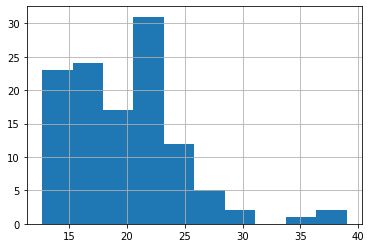

In [32]:
cars_1999.hist()

<AxesSubplot:>

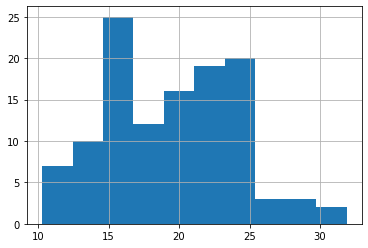

In [33]:
cars_2008.hist()

In [35]:
cars_1999.count(), cars_2008.count()

(117, 117)

In [36]:
# lets find the variance
cars_1999.var(), cars_2008.var()

(25.850396545865912, 22.550836772260343)

In [37]:
# # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(cars_2008, cars_1999)

# high p-value suggests that the populations have equal variances

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [40]:
# calculate t-statistic and p value

alpha = .05
t,p = stats.ttest_ind(cars_2008,cars_1999)

t, p, alpha

(-0.3011962975077886, 0.7635345888327115, 0.05)

In [39]:
if(p< alpha) & (t<0):
    print('We reject null Hypotheses')
else:
    print('we fail to reject null hypotheses')

we fail to reject null hypotheses


In [41]:
cars_2008.mean(), cars_1999.mean()

(19.488662986569054, 19.68238764869729)

#### Are compact cars more fuel-efficient than the average car?

In [45]:
compact_cars = mpg[mpg['class'] == 'compact'].mean_mpg

all_cars = mpg.mean_mpg.mean()

In [46]:
# comparing all cars using mean values for city and highway
t,p = stats.ttest_1samp(compact_cars, all_cars)

t, p/2, alpha

(7.512360093161354, 7.808833174403864e-10, 0.05)

<AxesSubplot:>

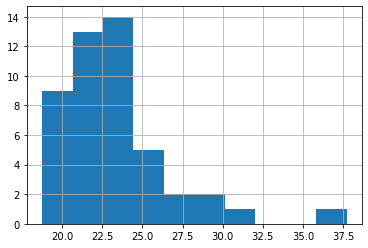

In [47]:
compact_cars.hist()

In [49]:
if(p/2 < alpha) & (t<0):
    print('We reject null Hypotheses')
else:
    print('we fail to reject null hypotheses')
    print(f'''Because p/2 ({p/2:.11f}) < alpha (.05) and t > 0''')

we fail to reject null hypotheses
Because p/2 (0.00000000078) < alpha (.05) and t > 0


##### Do manual cars get better gas mileage than automatic cars?¶


##### Here we are taking one sample and performing one tail test
 - H0: mean mpg for manual cars <= mean mpg for automatic cars
 - Ha : mean mpg for manual cars > mean mpg for automatic cars

In [50]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s4)       3
auto(s5)       3
auto(l3)       2
Name: trans, dtype: int64

In [51]:
fe_auto_cars = mpg[mpg.trans.str.contains('auto')].mean_mpg

fe_manual_cars = mpg[mpg.trans.str.contains('manual')].mean_mpg

<AxesSubplot:>

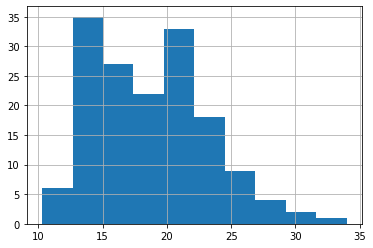

In [52]:
# examining the distribution for the fuel effeciency. in auto cars
fe_auto_cars.hist()

<AxesSubplot:>

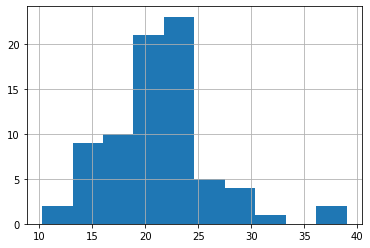

In [53]:
# examining the distribution for the fuel effeciency in manual cars
fe_manual_cars.hist()

In [54]:
# lets look at the  variances
fe_auto_cars.var(), fe_manual_cars.var()

(20.428279095002054, 25.665633639828275)

In [56]:
# # # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_auto_cars, fe_manual_cars)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [58]:
t, p = stats.ttest_ind(fe_manual_cars, fe_auto_cars, equal_var = True)
t, p/2, alpha

(4.652577547151351, 2.7552323050220026e-06, 0.05)

In [59]:
if(p/2 < alpha) & (t<0):
    print('We reject null Hypotheses')
else:
    print('we fail to reject null hypotheses')
    print(f'''Because p/2 ({p/2:.11f}) < alpha (.05) and t > 0''')

we fail to reject null hypotheses
Because p/2 (0.00000275523) < alpha (.05) and t > 0


In [60]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

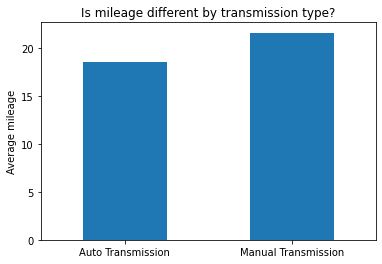

In [62]:
mpg.groupby('transmission_type').mean_mpg.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

## Correlation 

### 1 Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?


In [20]:
def get_db_url(db_name):
    from env import username, host, password
    return f'mysql+pymysql://{username}:{password}@{host}/{db_name}'

    

In [64]:
url = get_db_url("telco_churn")

sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
telco = pd.read_sql(sql, url)
telco.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
internet_service_type_id,1,1,2,2,2
online_security,No,No,No,No,No


#### Instructors review

** Needs data cleaning on my part

In [65]:
confidence_level = 0.95
alpha = 1 - confidence_level
alpha

0.050000000000000044

In [ ]:
# 𝐻𝑜 : tenure and monthly charges are not linearly correlated
# 𝐻𝑎 : tenure and monthly charges are linearly correlated

corr, p = stats.pearsonr(telco.tenure_month, telco.monthly_charges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

In [ ]:
# 𝐻𝑜 : tenure and total charges are not linearly correlated
# 𝐻𝑎 : tenure and total charges are linearly correlated

corr, p = stats.pearsonr(df.tenure_month, df.total_charges)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    
corr, p

In [ ]:
def correlation_test(x, y):
    message = ""
    corr, p = stats.pearsonr(x, y)
    
    if p < alpha:
        message = "reject the null hypothesis that there is no linear correlation. Evidence supports a linear correlation." 
    else:
        message = "fail to reject the null hypothesis that there is no linear correlation. Insufficient evidence to support a linear correlation between the two values."
    
    return corr, p, message

### How to Control for Variables
- Perform your original analysis in a way that removes the variable we're trying to control out of the question.
 - If we control for phone service, and test for linear correlation between tenure and monthly_charges, then we will create a no_phone and a phone group then check their tenure to monthly_charges correlation w/ the Pearson's test
 - If we also control for internet connection, we'll need to produce each pairing of subsets

In [70]:
# We'll run a correlation test for 
telco.phone_service.value_counts()
# We'll run a correlation test for 
#df.phone_type.value_counts()

Yes    6361
No      682
Name: phone_service, dtype: int64

In [ ]:
df.internet_type.value_counts()

In [ ]:
# Let's combine all these different values together
df["telecom_setup"] = df.internet_type + " " + df.phone_type
df.head().T

In [ ]:
df.telecom_setup.value_counts()

In [ ]:
options = df.telecom_setup.value_counts().index
options

In [ ]:
options[1]

In [ ]:
# Run through the set of all options for tenure vs. monthly_charges

output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.monthly_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. monthly_charges, controling for Internet/Phone service")
pd.DataFrame(output)

In [ ]:
fiber_2_lines = df[df.telecom_setup == "Fiber Optic Two or More Lines"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=fiber_2_lines)

In [ ]:
no_internet_one_line = df[df.telecom_setup == "No Internet Service One Line"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=no_internet_one_line)

In [ ]:
no_internet_multiple_lines = df[df.telecom_setup == "No Internet Service Two or More Lines"]
sns.scatterplot(x="tenure_month", y="monthly_charges", data=no_internet_multiple_lines)

In [ ]:
# Run through the set of all options for tenure vs. total_charges

output = []

for option in options:
    subset = df[df.telecom_setup == option]
    corr, p, message = correlation_test(subset.tenure_month, subset.total_charges)
    result = {
        "option": option,
        "corr": corr,
        "p": p,
        "message": message
    }
    output.append(result)

print("Correlation test for tenure vs. total_charges, controling for Internet/Phone service") 
pd.DataFrame(output)

### 2 Use the employees database.
#### Instructors review


In [71]:
url = get_db_url("employees")

sql= '''
    select datediff(curdate(), hire_date) as days_on_job, salary
    from employees
    join salaries using(emp_no)
    where to_date > curdate();
'''
employees = pd.read_sql(sql, url)
employees

,days_on_job,salary
0,12921,88958
1,13138,72527
2,12858,43311
3,12763,74057
4,11747,94692
...,...,...
240119,10529,52868
240120,11367,69501
240121,12987,83441
240122,10255,55003


<AxesSubplot:xlabel='days_on_job', ylabel='salary'>

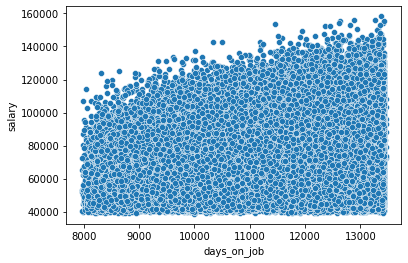

In [73]:
sns.scatterplot(x="days_on_job", y="salary", data=employees)


### Is there a relationship between how long an employee has been with the company and their salary?

$H_o$: There is not a linear correlation between employee tenure and salary

$H_a$: There is a linear correlation between employee tenure and salary



In [75]:
alpha = 0.05
corr, p = stats.pearsonr(employees.days_on_job, employees.salary)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation


(0.3064625613186078, 0.0)

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?¶


* $H_o$: There is no linear correlation between tenure and number of titles
* $H_a$: There is a linear correlation between tenure and number of titles


In [78]:
sql2 = """
select emp_no, count(title) as title_count, datediff(curdate(), hire_date) as days_on_job
from employees
join titles using(emp_no)
group by emp_no;
"""

In [80]:
df = pd.read_sql(sql2, get_db_url("employees"))
df.head()

,emp_no,title_count,days_on_job
0,10001,1,12921
1,10002,1,13138
2,10003,1,12858
3,10004,2,12763
4,10005,2,11747


In [81]:
corr, p = stats.pearsonr(df.days_on_job, df.title_count)

if p < alpha:
    print("We reject the null hypothesis")
    print("Evidence supports the claim that there is a linear correlation between tenure and number of titles")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis
Evidence supports the claim that there is a linear correlation between tenure and number of titles


(0.2665989299136619, 0.0)

* Takeaway: It's possible to have a super low p value, even zero p value, and still have a weak correlation. A super high number of observations can show significance through low p values

In [26]:
sleepstudy = data('sleepstudy')

In [27]:
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


##### Hypotheses 
*  $H_o$: There is no linear correlation between days and reaction time

* $H_a$: There is a linear correlation between days and reaction time



In [83]:
corr, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

corr, p

We reject the null hypothesis


(0.5352302262650253, 9.894096322214812e-15)

### CHI Square exercise
##### Instructor's work through

In [84]:
# Set the signifance level
conf_interval = 0.95
alpha = 1 - conf_interval

In [85]:
# create a dataframe:

contingency = pd.DataFrame({'codeup_student': [49,1], 'not_codeup': [20,30]}, index=['uses_macbook', 'not_macbook'])

In [86]:
contingency

,codeup_student,not_codeup
uses_macbook,49,20
not_macbook,1,30


 - H0: Macbook Usage is independent of being a Codeup Student
 - Ha: Macbook Usage is not independent of being a Codeup Student

In [87]:
chi2, p, degf, expected = stats.chi2_contingency(contingency)

print('Observed\n:')
print(contingency.values)
print('------------------------\nExpected: \n')
print(expected)
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')

Observed
:
[[49 20]
 [ 1 30]]
------------------------
Expected: 

[[34.5 34.5]
 [15.5 15.5]]
------------------------

chi2 = 36.65
p value: 0.0000
We can reject the null hypothesis


### 2. Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.¶


In [88]:
df = data('mpg')

In [89]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [90]:
df['transmission_type'] = np.where(df.trans.str.contains('auto'), 'Auto', 'Manual')


In [91]:
df.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,Auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,Manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,Manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,Auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,Auto


In [92]:
# pick our two categoricals
df.transmission_type.value_counts()


Auto      157
Manual     77
Name: transmission_type, dtype: int64

In [93]:
df['drv'].value_counts()


f    106
4    103
r     25
Name: drv, dtype: int64

In [94]:
a = df.transmission_type
b = df.drv

#### What is our null Hypothesis?
- H0: Transmission type independent of drive type on vehicles

In [95]:
# create a contingency table

observed = pd.crosstab(a,b)
observed

drv,4,f,r
transmission_type,,,
Auto,75,65,17
Manual,28,41,8


In [96]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed
:
[[75 65 17]
 [28 41  8]]
------------------------
Expected: 

[[69 71 16]
 [33 34  8]]
------------------------

chi2 = 3.14
p value: 0.2084
We fail to reject the null hypothesis


### 3. Use the data from the employees database to answer these questions:

#### is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [97]:
# make our query for the parameters that we want:

query = '''SELECT e.gender, d.dept_name
FROM employees AS e
JOIN dept_emp as dn ON dn.emp_no = e.emp_no
AND to_date > CURDATE()
JOIN departments AS d ON dn.dept_no = d.dept_no'''

In [98]:
# load up our data
gender_dept = pd.read_sql(query, get_db_url("employees"))

In [99]:
gender_dept.head()

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service


In [100]:
gender_dept.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   gender     240124 non-null  object
 1   dept_name  240124 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [101]:
# restrict that to just sales and marketing

gender_dept = gender_dept[(gender_dept.dept_name == 'Sales') | (gender_dept.dept_name == 'Marketing')]

In [102]:
# make our crosstab for observed values

observed = pd.crosstab(gender_dept.gender, gender_dept.dept_name)

In [103]:
observed


dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


#### Set up null and alternate hypothesis:


- HO gender of the employee is independent to department of marketing or sales
- Ha gender of the employee is not independent to department of marketing or sales

In [104]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.5f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed
:
[[ 5864 14999]
 [ 8978 22702]]
------------------------
Expected: 

[[ 5893 14969]
 [ 8948 22731]]
------------------------

chi2 = 0.32
p value: 0.56919
We fail to reject the null hypothesis


##### Is an employee's gender independent of whether or not they are or have been a manager?¶
set up a new query for this data. we want:
 
- employee gender, manager status

-  tables needed: employees, dept_manager

In [107]:
query2 = '''SELECT e.emp_no, e.gender, dm.dept_no
FROM employees as e
LEFT JOIN dept_manager AS dm ON e.emp_no = dm.emp_no'''

In [108]:
gender_manager = pd.read_sql(query2, url)


In [109]:
gender_manager

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [110]:
# rename that column and fill the na's

gender_manager = gender_manager.rename(columns={'dept_no': 'manager'}).fillna(0)

In [111]:
gender_manager.head()


,emp_no,gender,manager
0,10001,M,0
1,10002,F,0
2,10003,M,0
3,10004,M,0
4,10005,M,0


In [112]:
# run an apply function to make manager status a binary
gender_manager['manager'] = gender_manager['manager'].apply(lambda x: x if x == 0 else 1)


In [113]:
# another way (using np.where)

# gender_manager['manager'] = np.where(gender_manager.manager == 0, 0, 1)

In [114]:
gender_manager.manager.value_counts()


0    300000
1        24
Name: manager, dtype: int64

In [115]:
observed = pd.crosstab(gender_manager['gender'], gender_manager['manager'])

In [116]:
observed


manager,0,1
gender,,
F,120038,13
M,179962,11


- H0: Employee Gender is independent of history in management


In [117]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed
:
[[120038     13]
 [179962     11]]
------------------------
Expected: 

[[120041      9]
 [179958     14]]
------------------------

chi2 = 1.46
p value: 0.2275
We fail to reject the null hypothesis
